In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [2]:
df = pd.read_csv('hr_data.csv' )
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,28828,5.0,189,4,yes,still exist,0,management,low,0.83,0.98
1,16810,3.0,212,2,no,still exist,0,IT,low,0.50,0.91
2,16811,4.0,233,3,no,still exist,0,IT,low,0.69,0.97
3,16813,5.0,268,3,no,still exist,0,IT,low,0.87,0.91
4,16816,2.0,155,2,no,still exist,0,IT,low,0.37,0.43


# Walk Through Data and Labeling the columns

In [3]:
df.info() # check types and nulls and count of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14957 non-null  float64
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14942 non-null  object 
 5   left                   14999 non-null  object 
 6   promotion_last_5years  14972 non-null  object 
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14963 non-null  float64
 10  last_evaluation        14963 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 1.3+ MB


In [4]:
df.isna().sum() # check count of Nulls

employee_id               0
number_project           42
average_montly_hours      0
time_spend_company        0
Work_accident            57
left                      0
promotion_last_5years    27
department                0
salary                    0
satisfaction_level       36
last_evaluation          36
dtype: int64

<AxesSubplot:>

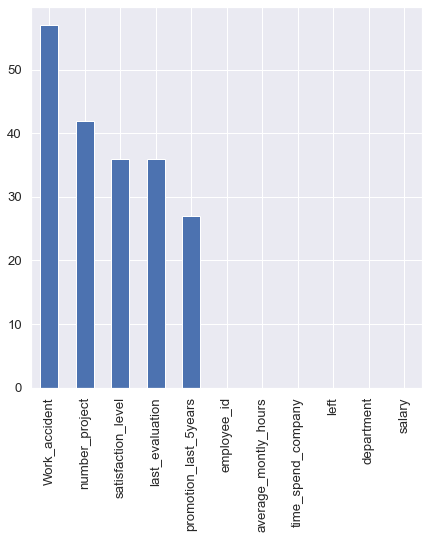

In [5]:
df.isna().sum().sort_values(ascending = False).plot(kind = 'bar') # Nulls with Visulaiztion

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,14999.0,45424.627575,25915.900127,1003.00,22872.50,45448.00,67480.50,99815.0
number_project,14957.0,3.803437,1.233235,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,205.466231,159.049343,96.00,156.00,200.00,245.00,5600.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
satisfaction_level,14963.0,0.612746,0.248735,0.09,0.44,0.64,0.82,1.0
last_evaluation,14963.0,0.716147,0.171149,0.36,0.56,0.72,0.87,1.0


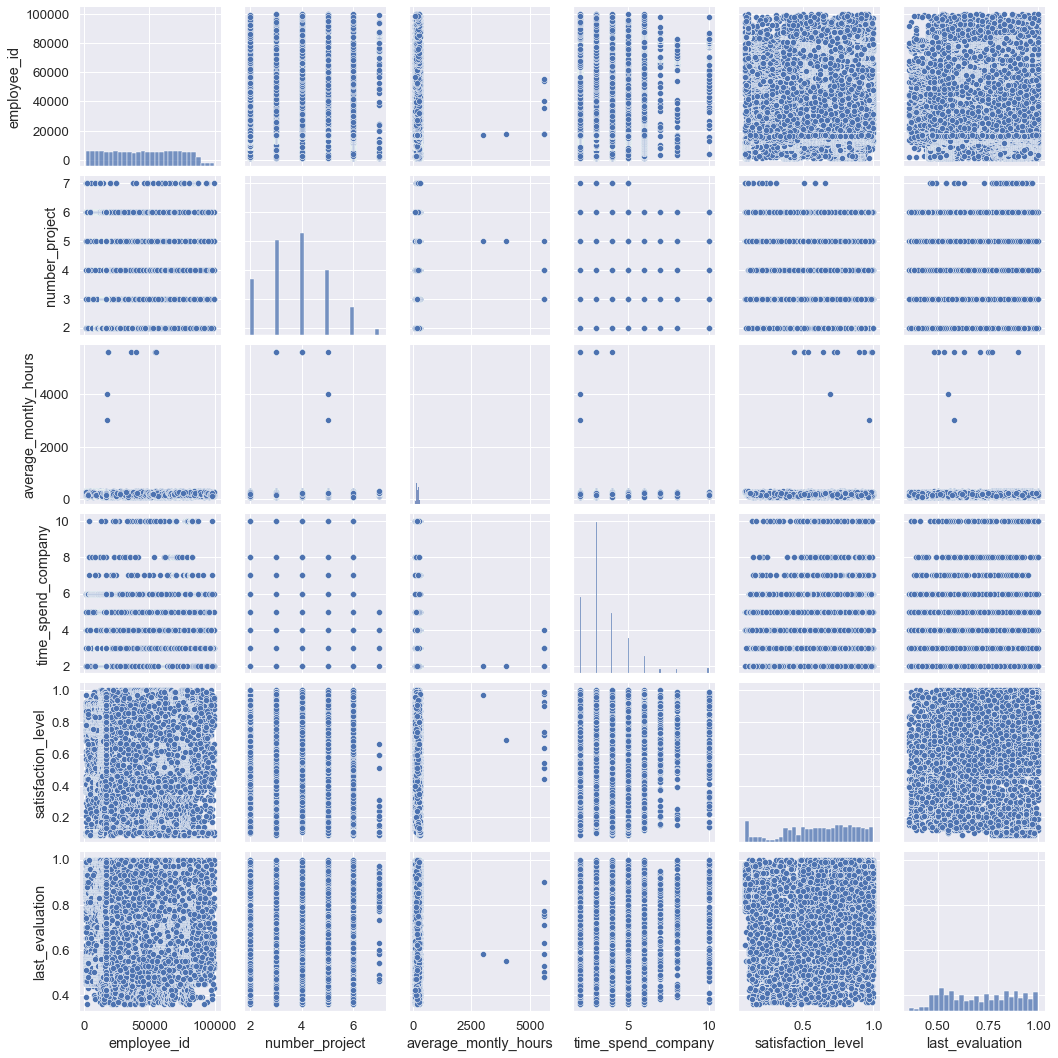

In [7]:
sns.pairplot(df) # the shape of data

In [8]:
df['Work_accident'].value_counts()

no     12823
yes     2119
Name: Work_accident, dtype: int64

In [9]:
# max of employees which faced an accident in thier work
df[['employee_id', 'Work_accident']].sort_values(by = 'Work_accident', ascending = False)[:10] 

,employee_id,Work_accident
0,28828,yes
1795,27221,yes
10549,78058,yes
10548,78043,yes
6891,38265,yes
10546,78032,yes
5343,48189,yes
10543,78008,yes
1808,18994,yes
1809,27279,yes


In [10]:

acc_map = {'no' : 0 , 'yes' :1 }
df['Work_accident'] = df['Work_accident'].map(acc_map)
df['Work_accident'].value_counts()

0.0    12823
1.0     2119
Name: Work_accident, dtype: int64

In [11]:
df['left'].value_counts()

still exist    11428
left            3571
Name: left, dtype: int64

In [12]:
# employees left and didn't faced an accident
df[[ 'left','Work_accident']].sort_values(by = 'Work_accident', ascending = True)[:10]

,left,Work_accident
7494,still exist,0.0
9767,left,0.0
9768,left,0.0
9769,left,0.0
9770,left,0.0
9771,left,0.0
9772,left,0.0
9773,left,0.0
9774,left,0.0
9775,left,0.0


In [13]:
df['left'].value_counts() * 100 / len(df) 

still exist    76.191746
left           23.808254
Name: left, dtype: float64

In [14]:
left_map = {'still exist' : 0 , 'left' :1 }
df['left'] = df['left'].map(left_map)
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [15]:
df['promotion_last_5years'].value_counts()

0      14680
yes      273
1         19
Name: promotion_last_5years, dtype: int64

In [16]:
promotion_last_5years_map = { 'yes' :1 , '0' :0 , '1' : 1}
df['promotion_last_5years'] = df['promotion_last_5years'].map(promotion_last_5years_map)
df['promotion_last_5years'].value_counts()

0.0    14680
1.0      292
Name: promotion_last_5years, dtype: int64

In [17]:
#count of emp by department and left of didn't left and go a prmomtion or not with all data
df.groupby(['department' ,'promotion_last_5years','left']).count()

employee_id  number_project  \
department  promotion_last_5years left                                
IT          0.0                   0             954             952   
                                  1             270             270   
            1.0                   1               3               3   
RandD       0.0                   0             639             639   
                                  1             121             121   
            1.0                   0              22              22   
accounting  0.0                   0             549             546   
                                  1             204             204   
            1.0                   0              13              13   
hr          0.0                   0             509             505   
                                  1             215             215   
            1.0                   0              15              15   
management  0.0                   0             473             472   
                                  1              88              88   
            1.0                   0              60              60   
                                  1               3               3   
marketing   0.0                   0             612             612   
                                  1             203             203   
            1.0                   0              42              42   
product_mng 0.0                   0             704             704   
                                  1             198             198   
sales       0.0                   0            3033            3026   
                                  1            1007            1007   
            1.0                   0              92              92   
                                  1               7               7   
support     0.0                   0            1657            1646   
                                  1             552             552   
            1.0                   0               8               8   
                                  1               3               3   
technical   0.0                   0            1998            1984   
                                  1             694             694   
            1.0                   0              21              21   
                                  1               3               3   

                                        average_montly_hours  \
department  promotion_last_5years left                         
IT          0.0                   0                      954   
                                  1                      270   
            1.0                   1                        3   
RandD       0.0                   0                      639   
                                  1                      121   
            1.0                   0                       22   
accounting  0.0                   0                      549   
                                  1                      204   
            1.0                   0                       13   
hr          0.0                   0                      509   
                                  1                      215   
            1.0                   0                       15   
management  0.0                   0                      473   
                                  1                       88   
            1.0                   0                       60   
                                  1                        3   
marketing   0.0                   0                      612   
                                  1                      203   
            1.0                   0                       42   
product_mng 0.0                   0                      704   
                                  1                      198   
sales       0.0                   0                     3033   
                  

In [18]:
df.groupby(['salary','Work_accident'])['department'].count()

salary  Work_accident
high    0.0              1045
        1.0               192
low     0.0              6273
        1.0              1013
medium  0.0              5505
        1.0               914
Name: department, dtype: int64

In [19]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [20]:
df.groupby(['department' ,'salary','left']).count()

employee_id  number_project  average_montly_hours  \
department  salary left                                                      
IT          high   0              79              79                    79   
                   1               4               4                     4   
            low    0             437             435                   437   
                   1             172             172                   172   
            medium 0             438             438                   438   
                   1              97              97                    97   
RandD       high   0              47              47                    47   
                   1               4               4                     4   
            low    0             309             309                   309   
                   1              55              55                    55   
            medium 0             310             310                   310   
                   1              62              62                    62   
accounting  high   0              69              69                    69   
                   1               5               5                     5   
            low    0             259             256                   259   
                   1              99              99                    99   
            medium 0             235             235                   235   
                   1             100             100                   100   
hr          high   0              39              39                    39   
                   1               6               6                     6   
            low    0             243             239                   243   
                   1              92              92                    92   
            medium 0             242             242                   242   
                   1             117             117                   117   
management  high   0             224             224                   224   
                   1               1               1                     1   
            low    0             121             121                   121   
                   1              59              59                    59   
            medium 0             194             193                   194   
                   1              31              31                    31   
marketing   high   0              71              71                    71   
                   1               9               9                     9   
            low    0             276             276                   276   
                   1             126             126                   126   
            medium 0             308             308                   308   
                   1              68              68                    68   
product_mng high   0              62              62                    62   
                   1               6               6                     6   
            low    0             346             346                   346   
                   1             105             105                   105   
            medium 0             296             296                   296   
                   1              87              87                    87   
sales       high   0             255             255                   255   
                   1              14              14                    14   
            low    0            1402            1396                  1402   
                   1             697             697                   697   
            medium 0            1469            1468                  1469   
                   1             303             303                   303   
support     high   0             133             132                   133   
                   1               8           

In [21]:
salary_map = { 'low' : 0 , 'medium' :1 , 'high'  : 2}
df['salary'] = df['salary'].map(salary_map)
df['salary'].value_counts()

0    7316
1    6446
2    1237
Name: salary, dtype: int64

In [22]:
df.groupby('department')['employee_id'].count() # num of emp by deoartment

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: employee_id, dtype: int64

In [23]:
df.groupby('salary')['employee_id'].count() # count of emp by salary  { 'low' : 0 , 'medium' :1 , 'high'  : 2}

salary
0    7316
1    6446
2    1237
Name: employee_id, dtype: int64

In [24]:
# describe salaries level for employees by thier department { 'low' : 0 , 'medium' :1 , 'high'  : 2}
df.groupby(['salary','department'])['employee_id'].count()


salary  department 
0       IT              609
        RandD           364
        accounting      358
        hr              335
        management      180
        marketing       402
        product_mng     451
        sales          2099
        support        1146
        technical      1372
1       IT              535
        RandD           372
        accounting      335
        hr              359
        management      225
        marketing       376
        product_mng     383
        sales          1772
        support         942
        technical      1147
2       IT               83
        RandD            51
        accounting       74
        hr               45
        management      225
        marketing        80
        product_mng      68
        sales           269
        support         141
        technical       201
Name: employee_id, dtype: int64

In [25]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [26]:
dep_map = {'management' : 0, 'IT' :1, 'product_mng':2, 'RandD':3, 'marketing':4, 'sales':5,
           'accounting':6, 'support' :7, 'technical':8, 'hr' : 9}
df['department'] = df['department'].map(dep_map)

dep_map

{'management': 0,
 'IT': 1,
 'product_mng': 2,
 'RandD': 3,
 'marketing': 4,
 'sales': 5,
 'accounting': 6,
 'support': 7,
 'technical': 8,
 'hr': 9}

In [27]:
df.groupby('department').sum()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,satisfaction_level,last_evaluation
department,,,,,,,,,,
0,33597098,2429.0,132223,2711,103.0,91,63.0,675,390.54,452.70
1,56344929,4676.0,248119,4256,161.0,273,3.0,701,757.56,878.02
2,44016858,3434.0,180369,3135,130.0,198,0.0,519,557.97,643.23
3,32948168,3033.0,160874,2650,130.0,121,22.0,474,487.80,559.73
4,40715777,3164.0,187253,3063,135.0,203,42.0,536,530.01,611.32
5,192072490,15611.0,862694,14631,573.0,1014,99.0,2310,2539.49,2932.99
6,34474313,2922.0,154292,2702,93.0,204,13.0,483,446.07,549.99
7,97874011,8434.0,452933,7563,336.0,555,11.0,1224,1373.38,1607.51
8,117615620,10497.0,556203,9279,372.0,697,24.0,1549,1644.39,1956.93


In [28]:
df['department'].value_counts()

5    4140
8    2720
7    2229
1    1227
2     902
4     858
3     787
6     767
9     739
0     630
Name: department, dtype: int64

# Data Cleaning and Visualizing

In [29]:
df.isnull().sum()

employee_id               0
number_project           42
average_montly_hours      0
time_spend_company        0
Work_accident            57
left                      0
promotion_last_5years    27
department                0
salary                    0
satisfaction_level       36
last_evaluation          36
dtype: int64

<AxesSubplot:>

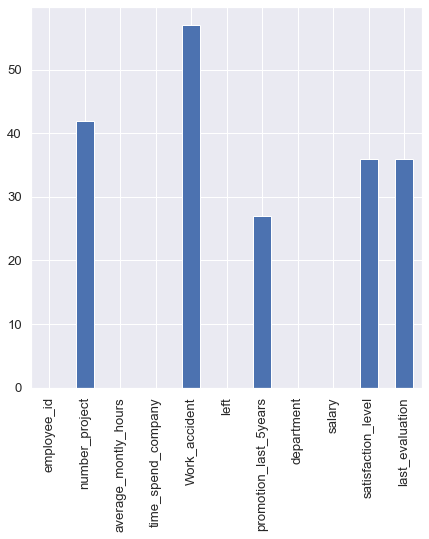

In [30]:
df.isnull().sum().plot(kind = 'bar')

In [31]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [32]:
df['number_project'] = imputer.fit_transform(df[['number_project']])
df['Work_accident'] = imputer.fit_transform(df[['Work_accident']])
df['promotion_last_5years'] = imputer.fit_transform(df[['promotion_last_5years']])
df['satisfaction_level'] = imputer.fit_transform(df[['satisfaction_level']])
df['last_evaluation'] = imputer.fit_transform(df[['promotion_last_5years']])

In [33]:
df.isnull().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

In [34]:
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,28828,5.0,189,4,1.0,0,0.0,0,0,0.83,0.0
1,16810,3.0,212,2,0.0,0,0.0,1,0,0.50,0.0
2,16811,4.0,233,3,0.0,0,0.0,1,0,0.69,0.0
3,16813,5.0,268,3,0.0,0,0.0,1,0,0.87,0.0
4,16816,2.0,155,2,0.0,0,0.0,1,0,0.37,0.0


In [35]:
df['number_project'].max()

7.0

In [36]:
df['average_montly_hours'].max() ## need to check if it's outliers

5600

In [37]:
df['average_montly_hours'].min()

96

In [38]:
df['time_spend_company'].max()

10

In [39]:
df['satisfaction_level'].max()

1.0

In [40]:
df['last_evaluation'].max()

1.0

<AxesSubplot:xlabel='average_montly_hours'>

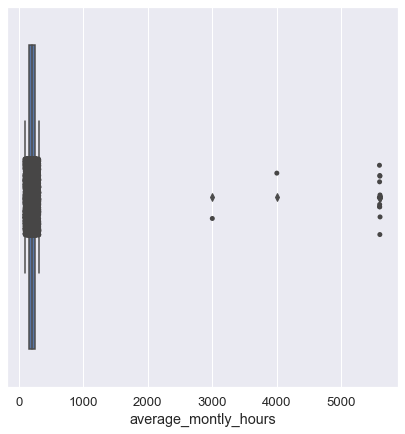

In [41]:
sns.boxplot(x='average_montly_hours', data=df)
sns.stripplot(x='average_montly_hours', data=df, color="#474646")

In [42]:
from datasist.structdata import detect_outliers
outliers_indices = detect_outliers(df, 0, ['average_montly_hours'])
len(outliers_indices)

13

In [43]:
df.drop(index = outliers_indices, inplace=True)
df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,28828,5.0,189,4,1.000000,0,0.0,0,0,0.83,0.0
1,16810,3.0,212,2,0.000000,0,0.0,1,0,0.50,0.0
2,16811,4.0,233,3,0.000000,0,0.0,1,0,0.69,0.0
3,16813,5.0,268,3,0.000000,0,0.0,1,0,0.87,0.0
4,16816,2.0,155,2,0.000000,0,0.0,1,0,0.37,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14994,27566,4.0,185,2,0.141815,0,0.0,7,0,0.74,0.0
14995,16783,4.0,237,3,1.000000,0,0.0,7,1,0.66,0.0
14996,16784,5.0,244,3,0.000000,0,0.0,8,1,0.66,0.0
14997,16786,3.0,178,4,0.000000,0,0.0,8,1,0.59,0.0


<AxesSubplot:xlabel='average_montly_hours'>

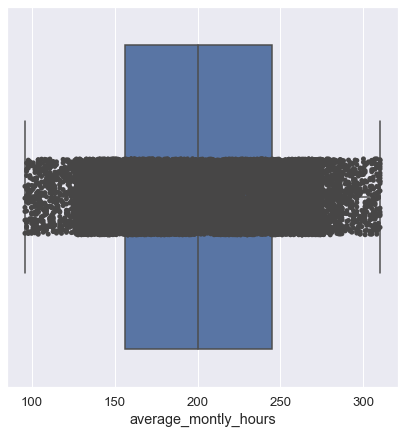

In [44]:
sns.boxplot(x='average_montly_hours', data=df)
sns.stripplot(x='average_montly_hours', data=df, color="#474646")

In [45]:
df['Work_accident'] = df['Work_accident'].astype(int)

In [46]:
df['promotion_last_5years'] = df['promotion_last_5years'].astype(int)

In [47]:
df['number_project'] = df['number_project'].astype(int)

In [48]:
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,28828,5,189,4,1,0,0,0,0,0.83,0.0
1,16810,3,212,2,0,0,0,1,0,0.50,0.0
2,16811,4,233,3,0,0,0,1,0,0.69,0.0
3,16813,5,268,3,0,0,0,1,0,0.87,0.0
4,16816,2,155,2,0,0,0,1,0,0.37,0.0


<AxesSubplot:xlabel='left', ylabel='count'>

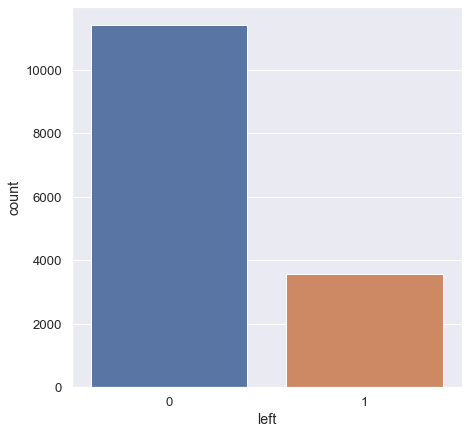

In [49]:
sns.countplot(data=df,x='left')

<AxesSubplot:xlabel='Work_accident', ylabel='count'>

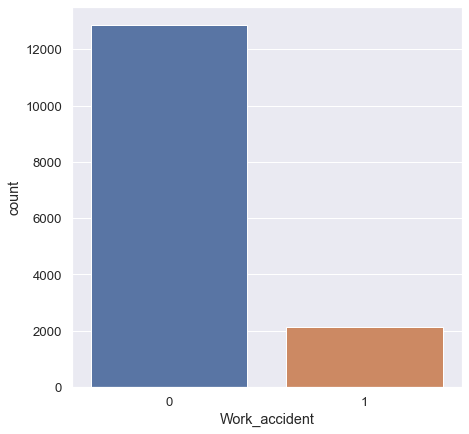

In [50]:
sns.countplot(data=df,x='Work_accident')

<AxesSubplot:xlabel='promotion_last_5years', ylabel='satisfaction_level'>

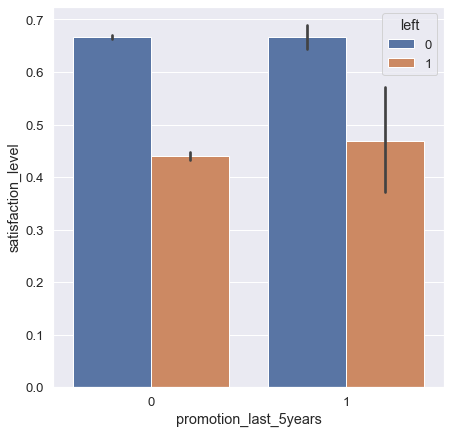

In [51]:
sns.barplot(data=df,hue='left' , x='promotion_last_5years',y='satisfaction_level')

<AxesSubplot:xlabel='department', ylabel='Count'>

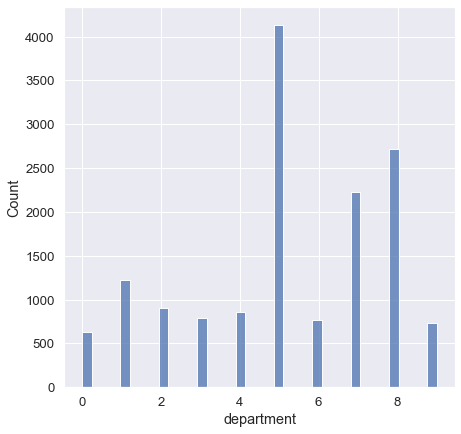

In [52]:
sns.histplot(df['department'])

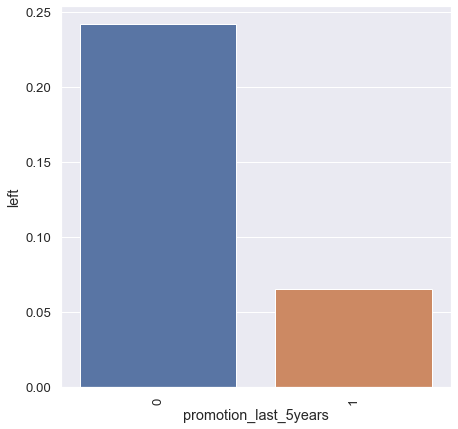

In [53]:
color = sns.color_palette()[-1]
sns.barplot(data = df, x = 'promotion_last_5years', y = 'left', ci = None)
plt.xticks(rotation = 90);

<AxesSubplot:>

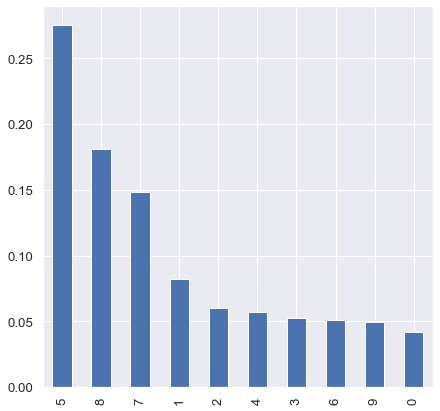

In [54]:
#dep_map = {'management' : 0, 'IT' :1, 'product_mng':2, 'RandD':3, 'marketing':4, 'sales':5,
#'accounting':6, 'support' :7, 'technical':8, 'hr' : 9}
df['department'].value_counts(normalize = True).plot(kind = 'bar')

<AxesSubplot:xlabel='salary'>

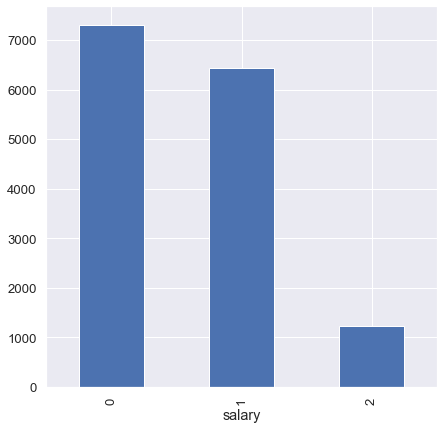

In [55]:
#{ 'low' : 0 , 'medium' :1 , 'high'  : 2}
df.groupby('salary')['employee_id'].count().plot(kind = 'bar')

<AxesSubplot:>

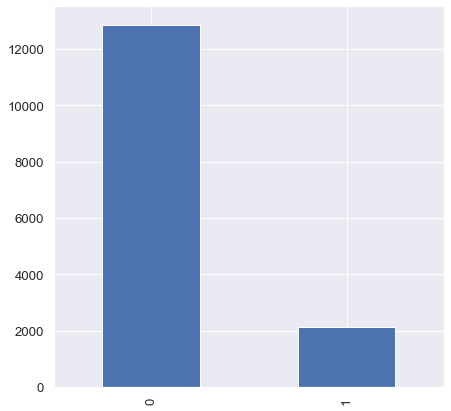

In [56]:
df['Work_accident'].value_counts().plot(kind = 'bar')

<AxesSubplot:ylabel='employee_id'>

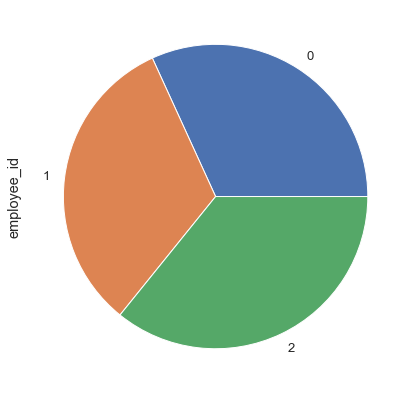

In [57]:
df.groupby('salary')['employee_id'].mean().plot(kind = 'pie')

In [58]:
df.drop(columns='employee_id',inplace=True)

In [59]:
df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,5,189,4,1,0,0,0,0,0.83,0.0
1,3,212,2,0,0,0,1,0,0.50,0.0
2,4,233,3,0,0,0,1,0,0.69,0.0
3,5,268,3,0,0,0,1,0,0.87,0.0
4,2,155,2,0,0,0,1,0,0.37,0.0


In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

In [61]:
X = df.drop('left', axis=1)
y = df['left']
X = X.values
y = y.values

In [62]:
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [63]:
#y_train.value_counts() *100 / len(y_train)

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, min_samples_split=4)
#model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score, fbeta_score, classification_report

print(f'Training Accuracy: {model.score(X_train, y_train)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
print(f'Testing F-1: {f1_score(y_test, y_pred)}')
print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')
print(f'\nTesting classification_report: \n{classification_report(y_test, y_pred)}')
print('-'*30)

Training Accuracy: 0.9464464464464465
Testing Accuracy: 0.9536357571714477
Testing Confusion Matrix: 
[[2193   86]
 [  53  666]]
Testing Recall: 0.9262865090403338
Testing Precesion: 0.8856382978723404
Testing F-1: 0.9055064581917062
Testing F-Beta: 0.8934800107324926

Testing classification_report: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2279
           1       0.89      0.93      0.91       719

    accuracy                           0.95      2998
   macro avg       0.93      0.94      0.94      2998
weighted avg       0.95      0.95      0.95      2998

------------------------------


<AxesSubplot:>

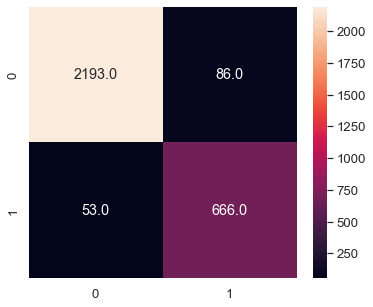

In [66]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,5))

sns.heatmap(cm, annot = True, fmt = '.1f' )

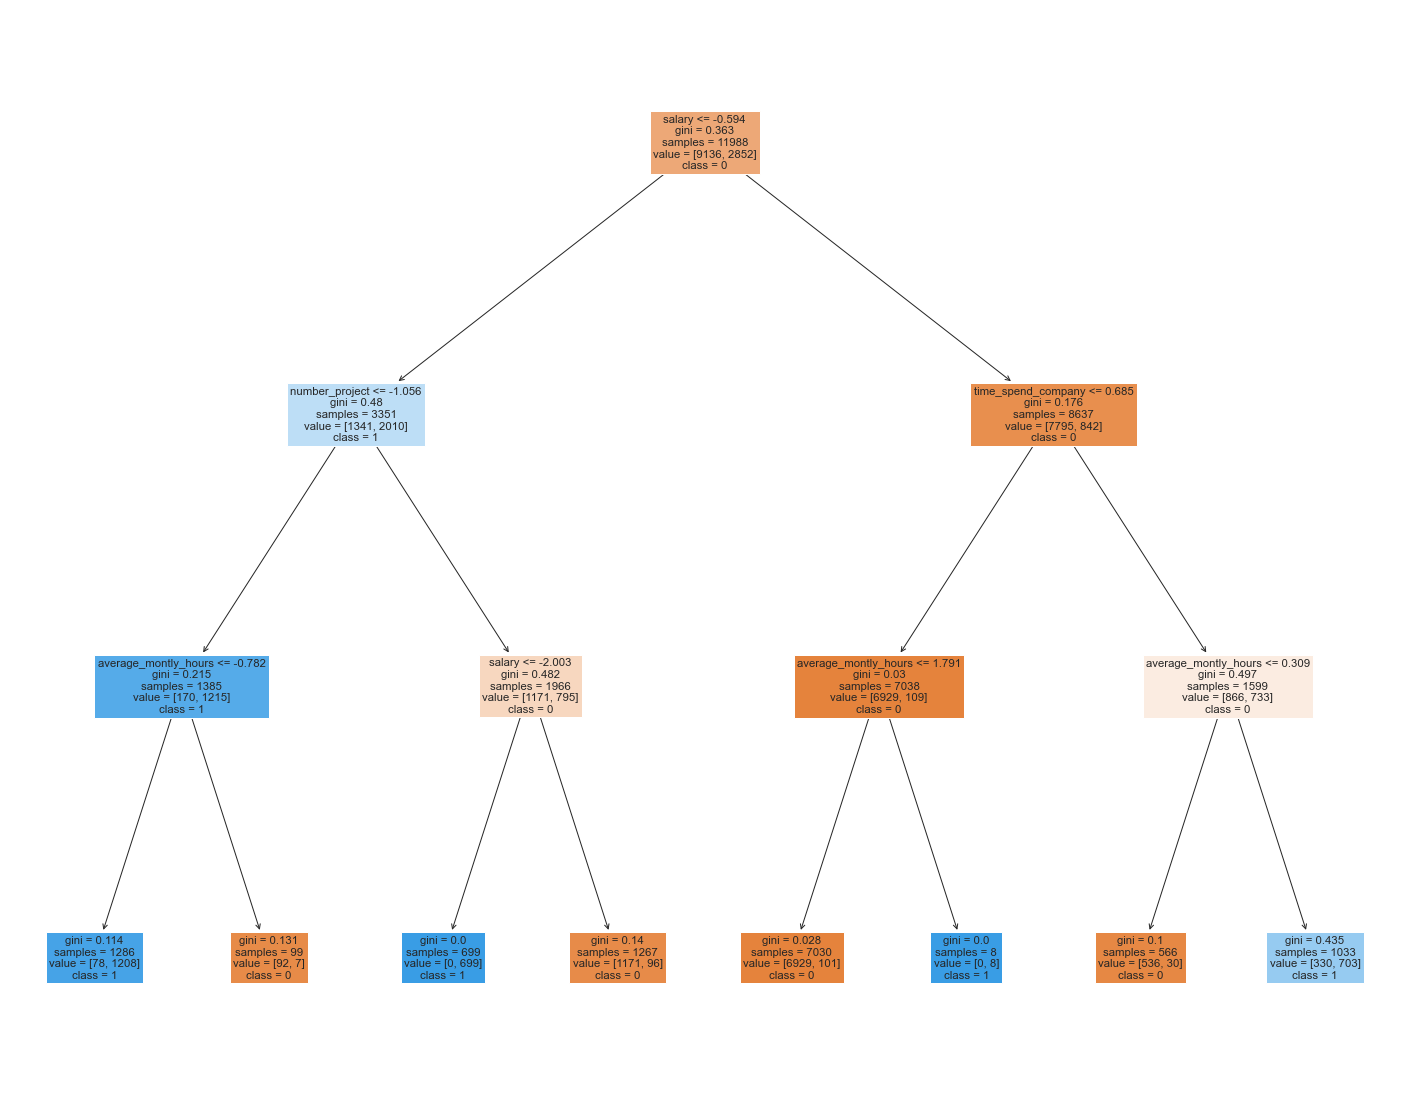

In [67]:
from sklearn import tree
text_representation = tree.export_text(model)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names = df.columns,  
                  class_names = ['0', '1'],
                  filled = True)

In [68]:
import joblib

In [69]:
joblib.dump(model , 'model.h5')

['model.h5']

In [70]:
joblib.dump(scaler , 'scaler.h5')

['scaler.h5']

In [71]:
d = [['5', '300', '3', '0', '0', '0', '0', '0.17', '0.11']]
model.predict(d)

array([1], dtype=int64)

In [72]:
model.predict(scaler.transform([['5','286', '3', '0', '1', '1', '0', '8', '9']]))

array([0], dtype=int64)